In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:

df = pd.read_csv('/Users/tshmacm1168/Desktop/machine learning project/Sendy.csv') 

In [44]:
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,16358,2839,0,3,0,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,362,745
1,12783,1212,0,3,1,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,812,1993
2,7485,1560,0,3,0,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,61,455
3,20667,381,0,3,0,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,811,1341
4,14863,690,0,1,1,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,720,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,20251,939,0,3,1,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,914,9
21197,10710,742,0,3,0,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,61,770
21198,15187,1845,0,3,0,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,644,2953
21199,18038,1437,0,1,1,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,270,1380


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  int64  
 1   User Id                                    21201 non-null  int64  
 2   Vehicle Type                               21201 non-null  int64  
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  int64  
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [53]:
df.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

**Encoding**

In [52]:
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,16358,2839,0,3,0,9,5,9:35:46 AM,9,5,...,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,362,745
1,12783,1212,0,3,1,12,5,11:16:16 AM,12,5,...,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,812,1993
2,7485,1560,0,3,0,30,2,12:39:25 PM,30,2,...,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,61,455
3,20667,381,0,3,0,15,5,9:25:34 AM,15,5,...,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,811,1341
4,14863,690,0,1,1,13,1,9:55:18 AM,13,1,...,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,720,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,20251,939,0,3,1,20,3,3:54:38 PM,20,3,...,3,4:20:17 PM,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,914,9
21197,10710,742,0,3,0,13,6,10:13:34 AM,13,6,...,6,10:46:17 AM,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,61,770
21198,15187,1845,0,3,0,7,4,5:06:16 PM,7,4,...,4,6:40:05 PM,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,644,2953
21199,18038,1437,0,1,1,4,3,9:31:39 AM,4,3,...,3,10:08:15 AM,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,270,1380


In [42]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Order No'] = label_encoder.fit_transform(df['Order No'])
df['User Id'] = label_encoder.fit_transform(df['User Id'])
df['Vehicle Type'] = label_encoder.fit_transform(df['Vehicle Type'])
df['Personal or Business'] = label_encoder.fit_transform(df['Personal or Business'])
df['Rider Id'] = label_encoder.fit_transform(df['Rider Id'])


In [25]:
df.rename(columns={'Placement - Time2': 'Placement Time'}, inplace=True)

In [26]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Arrival at Destination - Time'] = df['Arrival at Destination - Time'].apply(converttohour)


In [27]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [28]:
df.describe()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,...,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.0,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,10600.000000,1668.857931,0.0,2.752182,0.180039,15.653696,3.240083,15.653837,3.240225,15.653837,...,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,460.850054,1556.920947
std,6120.345864,929.008998,0.0,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,...,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,274.011108,987.270788
min,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,0.000000,1.000000
25%,5300.000000,858.000000,0.0,3.000000,0.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,220.000000,882.000000
50%,10600.000000,1727.000000,0.0,3.000000,0.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,460.000000,1369.000000
75%,15900.000000,2514.000000,0.0,3.000000,0.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,700.000000,2040.000000
max,21200.000000,3185.000000,0.0,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,923.000000,7883.000000


In [29]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_col = df.select_dtypes(include=['object']).columns

print("Numerical Col:", numerical_cols)
print("Categorical Col:", categorical_col)

Numerical Col: Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')
Categorical Col: Index(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time'],
      dtype='object')


In [30]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

**Handle Missing Values**

In [50]:
df.drop(columns=['Precipitation in millimeters'], inplace = True)

In [51]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)

/var/folders/pl/nw9j1mq920978rdfc418s8fm0000gn/T/ipykernel_82103/2283007735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)


**Comparing variables**

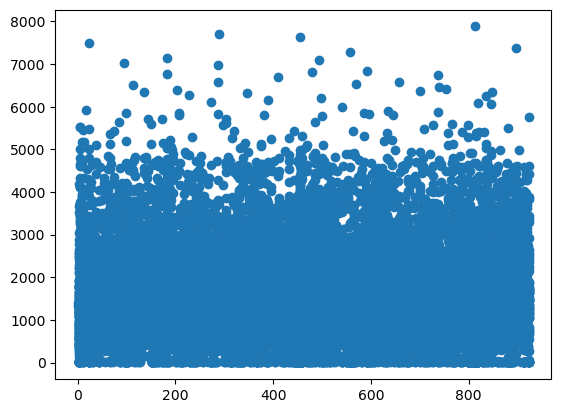

In [33]:
plt.scatter(df['Rider Id'],df['Time from Pickup to Arrival'])

In [ ]:
plt.scatter(df['Placement Time'],df['Time from Pickup to Arrival'])

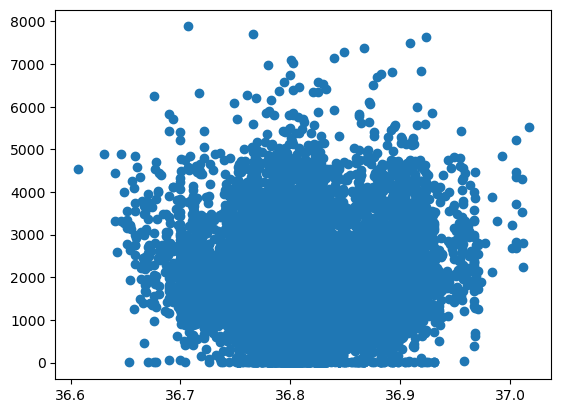

In [ ]:
plt.scatter(df['Destination Long'],df['Time from Pickup to Arrival'])

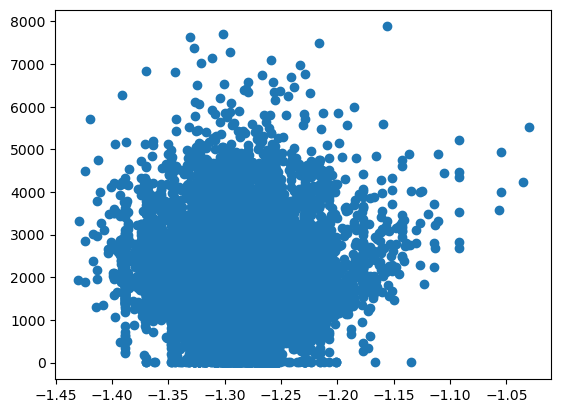

In [ ]:
plt.scatter(df['Destination Lat'],df['Time from Pickup to Arrival'])

**Using Metrics**

In [ ]:
rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [ ]:
import numpy as np
rs = np.random.RandomState(0)
corr = df.corr()


In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(21201, 28))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(12, 10))
correlation_data = df
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Target')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()